In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

### Reviews, including unique id for each reviewer and detailed comments

In [20]:
# load reviews dataset
reviews = pd.read_csv('reviews.csv')
print(reviews.shape)
reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Calendar, including listing id and the price and availability for that day

In [3]:
# load calendar dataset
calendar = pd.read_csv('calendar.csv')
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Listings, including full descriptions and average review score 

In [5]:
# load listing dataset
listings = pd.read_csv('listings.csv')
print(listings.shape)
listings.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### which columns has missing values ?

In [15]:
df = listings
df.columns[df.isnull().mean() > 0]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

In [21]:
df = reviews
df.columns[df.isnull().mean() > 0]

Index(['comments'], dtype='object')

In [22]:
df = calendar
df.columns[df.isnull().mean() > 0]

Index(['price'], dtype='object')

### which columns has no missing values ?

In [16]:
df = listings
df.columns[df.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [23]:
df = reviews
df.columns[df.isnull().mean() == 0]

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')

In [24]:
df = calendar
df.columns[df.isnull().mean() == 0]

Index(['listing_id', 'date', 'available'], dtype='object')

### what about the ratings ?

In [59]:
df = listings
df["reviews_per_month"].isnull().mean()
# not consider the nan
df = df[~df["reviews_per_month"].isnull()]

0     1124
1      752
2      505
3      345
4      212
5      123
6       58
7       41
8       15
9        9
10       5
11       1
12       1
Name: reviews_per_month, dtype: int64


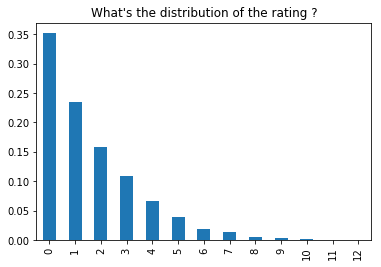

In [58]:
fill_fun = lambda x : 0 if str(x) == "nan" else int(x)
ratings = df["reviews_per_month"].apply(fill_fun).value_counts()
print(ratings)
(ratings/df.shape[0]).plot(kind="bar");
plt.title("What's the distribution of the rating ?");

### What about the pricing ?

In [63]:
df = calendar
df = df[~df['price'].isnull()]

50      354006
100     228574
150     128321
0        63143
200      58205
250      41143
300      17434
350      15490
400       7617
450       7054
550       2830
500       2658
700       2121
600       1988
650       1034
750        682
950        502
900        408
1000       370
800        319
850        316
1050       120
1650        91
1150        71
1450        28
1250        15
1200         2
Name: price, dtype: int64


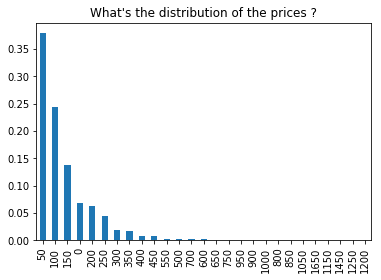

In [73]:
fill_fun = lambda x : int(float(x.replace('$', '').replace(',',''))/50)*50
prices = df["price"].apply(fill_fun).value_counts()
print(prices)
(prices/df.shape[0]).plot(kind="bar");
plt.title("What's the distribution of the prices ?");